# Libraries

In [1]:
!pip install pmdarima

In [17]:
import pandas as pd
from pmdarima import auto_arima #func to compute sarima model

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


# COFFEE Data

In [11]:
#Read coffee data
coffee_df = pd.read_excel('coffee_data.xlsx')

coffee_df['Ngày'] = pd.to_datetime(coffee_df['Ngày'])
coffee_df.drop(coffee_df.columns[[0, 1, 2, 3]], axis=1, inplace=True)
coffee_df.set_index('Ngày', inplace=True)
#coffee_df = coffee_df.asfreq("D") ->avoid issue with data frequency

In [12]:
coffee_df.head()

,Giá
Ngày,
2021-01-01,31667.5
2021-01-04,32717.0
2021-01-05,32417.0
2021-01-06,32317.0
2021-01-07,32117.0


In [13]:
#training and test set
training = coffee_df.iloc[:-31,:] #up to 31 day ?
test = coffee_df.iloc[-31:, :]

# SARIMA Model for coffee data

In [14]:
#SARIMA model - finding the best parameter
model = auto_arima(y = training.Giá,
                   m = 7) #m = 7 is the optimal seasonal component

In [18]:
#Predictions
pd.Series(model.predict(n_periods = len(test)))

593    49789.935060
594    49722.417699
595    49703.966517
596    49734.045744
597    49714.862256
598    49752.434956
599    49781.818507
600    49764.860230
601    49805.551552
602    49817.694809
603    49801.350662
604    49815.230190
605    49788.181574
606    49766.555433
607    49778.960797
608    49755.397451
609    49747.519292
610    49755.328425
611    49744.953325
612    49764.749658
613    49781.098293
614    49771.938717
615    49784.664721
616    49789.644969
617    49787.028362
618    49795.061343
619    49780.330747
620    49767.629509
621    49774.440844
622    49768.481588
623    49765.478707
dtype: float64

In [19]:
predictions = pd.Series(model.predict(n_periods = len(test)))
predictions.index = test.index
predictions[:5]

Ngày
2023-04-07    49789.935060
2023-04-10    49722.417699
2023-04-11    49703.966517
2023-04-12    49734.045744
2023-04-13    49714.862256
dtype: float64

<AxesSubplot:xlabel='Ngày'>

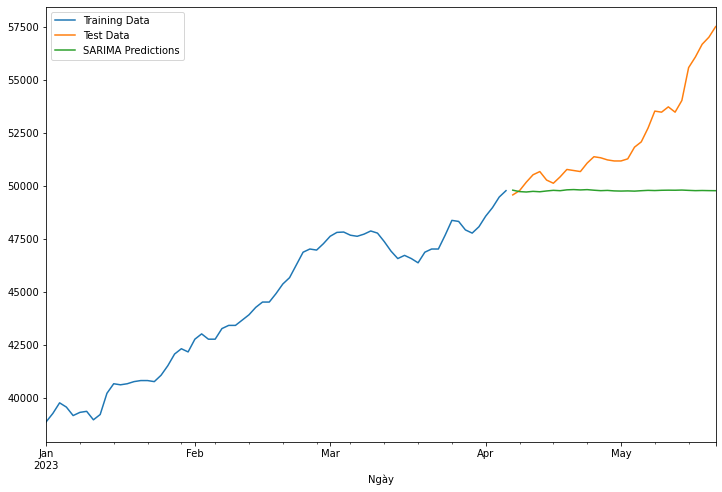

In [26]:
#Visualization
training['Giá']['2023-01-01':].plot(figsize = (12,8), label='Training Data', legend = True)
test['Giá'].plot(label='Test Data', legend = True)
predictions.plot(label='SARIMA Predictions', legend = True)

# TOMATO

In [46]:
tomato_df = pd.read_excel('tomato_data.xls')

tomato_df['Ngày'] = pd.to_datetime(tomato_df['Ngày tháng'])
tomato_df.drop(tomato_df.columns[[0, 1, 2, 3, 5]], axis=1, inplace=True)
tomato_df.set_index('Ngày', inplace=True)
tomato_df = tomato_df.asfreq("D") #-> display NaN data -> avoid issue with data frequency

In [47]:
tomato_df.rename(columns={'Giá tại chợ': 'Gia_tai_cho'}, inplace=True)
print(tomato_df)

            Gia_tai_cho
Ngày                   
2015-01-16          9.0
2015-01-17          NaN
2015-01-18          NaN
2015-01-19          9.0
2015-01-20          NaN
...                 ...
2023-05-06          NaN
2023-05-07          NaN
2023-05-08      25000.0
2023-05-09          NaN
2023-05-10      25000.0

[3037 rows x 1 columns]


In [52]:
tomato_df.fillna(tomato_df.mean(), inplace=True) # handle missing values 

In [53]:
#training and test set
training = tomato_df.iloc[:-31,:] #up to 31 day ?
test = tomato_df.iloc[-31:, :]

In [54]:
#SARIMA model - finding the best parameter
model = auto_arima(y = training.Gia_tai_cho,
                   m = 7) #m = 7 is the optimal seasonal component

In [55]:
#Predictions
pd.Series(model.predict(n_periods = len(test)))

2023-04-10    23994.441187
2023-04-11    15796.612472
2023-04-12    25366.228880
2023-04-13    15741.292645
2023-04-14    23508.518905
2023-04-15    16700.624357
2023-04-16    17051.150680
2023-04-17    24087.848436
2023-04-18    16110.143871
2023-04-19    25372.418472
2023-04-20    16036.034531
2023-04-21    23653.368039
2023-04-22    16855.848461
2023-04-23    17212.697277
2023-04-24    24168.707572
2023-04-25    16379.777789
2023-04-26    25422.856417
2023-04-27    16292.501012
2023-04-28    23755.164261
2023-04-29    17035.050999
2023-04-30    17401.298737
2023-05-01    24268.664368
2023-05-02    16625.531985
2023-05-03    25497.108631
2023-05-04    16529.729002
2023-05-05    23868.278790
2023-05-06    17212.473277
2023-05-07    17582.438845
2023-05-08    24383.292983
2023-05-09    16852.665034
2023-05-10    25590.136388
Freq: D, dtype: float64

In [56]:
predictions = pd.Series(model.predict(n_periods = len(test)))
predictions.index = test.index
predictions[:5]

Ngày
2023-04-10    23994.441187
2023-04-11    15796.612472
2023-04-12    25366.228880
2023-04-13    15741.292645
2023-04-14    23508.518905
Freq: D, dtype: float64

<AxesSubplot:xlabel='Ngày'>

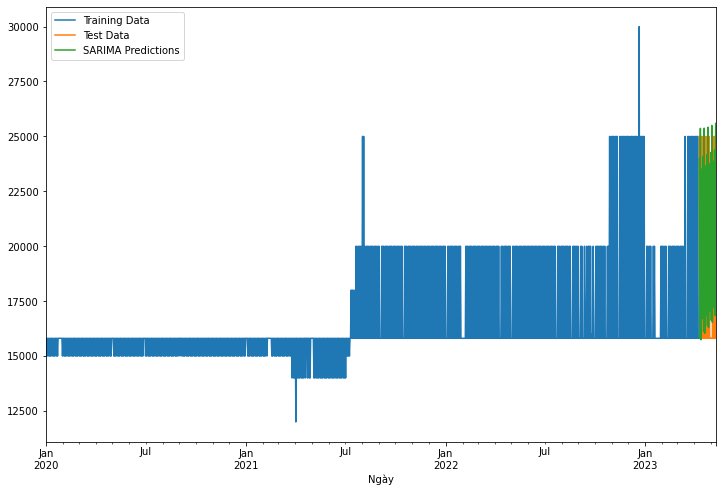

In [58]:
#Visualization
training['Gia_tai_cho']['2020-01-01':].plot(figsize = (12,8), label='Training Data', legend = True)
test['Gia_tai_cho'].plot(label='Test Data', legend = True)
predictions.plot(label='SARIMA Predictions', legend = True)